<a href="https://colab.research.google.com/github/theviderlab/computer_vision/blob/main/17_DIY_for_a_Spy_Utilizing_YOLOv8_Object_Detection_in_Military_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 807.6 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

In [2]:
import cv2
import urllib.request

from ultralytics import YOLO, checks, hub
from google.colab.patches import cv2_imshow

#Model training#

In [3]:
hub.login('a246655360d5792216f4213af64310abda1193e2c9')

model = YOLO('https://hub.ultralytics.com/models/XQR1uKdeL6E1nWCBukcW')
results = model.train()

requirements: Ultralytics requirement ['hub-sdk>=0.0.8'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 4.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.9s, installed 1 package: ['hub-sdk>=0.0.8']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Ultralytics HUB: New authentication successful ✅
Ultralytics HUB: View model at https://hub.ultralytics.com/models/XQR1uKdeL6E1nWCBukcW 🚀


100%|██████████| 21.5M/21.5M [00:00<00:00, 106MB/s] 


Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=https://storage.googleapis.com/ultralytics-hub.appspot.com/users/LYblulzoQ4PUmFMR3FcNigKoqzb2/datasets/ppqkCKjroELMVH1oRyrE/Aerial Imagery.v1i.yolov8.zip, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=None, device=[0], workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=

100%|██████████| 161M/161M [00:07<00:00, 22.1MB/s]
Unzipping Aerial Imagery.v1i.yolov8.zip to /content/datasets/Aerial Imagery.v1i.yolov8...: 100%|██████████| 6364/6364 [00:01<00:00, 3992.76file/s]


100%|██████████| 755k/755k [00:00<00:00, 23.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 124MB/s]


AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.26G reserved, 0.13G allocated, 14.37G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    11135987       28.65         0.377         36.08         189.4        (1, 3, 640, 640)                    list
    11135987       57.29         0.562         27.38          83.1        (2, 3, 640, 640)                    list
    11135987       114.6         1.028         31.89         73.05        (4, 3, 640, 640)                    list
    11135987       229.2         1.957         42.37         68.28        (8, 3, 640, 640)                    list
    11135987       458.4         3.641         71.87         93.15       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 38 for CUDA:0 8.87G/14.75G (60%) ✅


train: Scanning /content/datasets/Aerial Imagery.v1i.yolov8/train/labels... 2976 images, 14 backgrounds, 0 corrupt: 100%|██████████| 2976/2976 [00:01<00:00, 2005.56it/s]


train: New cache created: /content/datasets/Aerial Imagery.v1i.yolov8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/Aerial Imagery.v1i.yolov8/valid/labels... 132 images, 0 backgrounds, 0 corrupt: 100%|██████████| 132/132 [00:00<00:00, 1693.04it/s]

val: New cache created: /content/datasets/Aerial Imagery.v1i.yolov8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00059375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      11.9G      1.803       1.52      1.145        308        640: 100%|██████████| 79/79 [01:08<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all        132       2036      0.809      0.729        0.8      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100        11G      1.582     0.8624      1.048        189        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        132       2036      0.762      0.699      0.747      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.57G      1.551     0.8391      1.047        208        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        132       2036      0.871      0.767      0.856      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.7G      1.515     0.7749      1.028        187        640: 100%|██████████| 79/79 [00:58<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        132       2036      0.855       0.78      0.867      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.96G      1.486      0.756      1.022        164        640: 100%|██████████| 79/79 [01:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all        132       2036      0.901      0.812       0.89      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.7G      1.457      0.739      1.017        122        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all        132       2036      0.892      0.824      0.903      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.1G      1.441     0.7069      1.008        230        640: 100%|██████████| 79/79 [00:58<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        132       2036      0.902      0.835      0.889      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      12.3G      1.406     0.6888      1.001        204        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]

                   all        132       2036      0.899      0.798      0.873      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.5G      1.402     0.6787     0.9962        270        640: 100%|██████████| 79/79 [00:59<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        132       2036      0.892      0.835      0.895       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.1G      1.359     0.6566     0.9846        174        640: 100%|██████████| 79/79 [01:00<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all        132       2036      0.921      0.844      0.916       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.6G      1.369     0.6539      0.987        192        640: 100%|██████████| 79/79 [01:00<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        132       2036      0.903      0.839      0.911      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.92G      1.333     0.6312     0.9735        165        640: 100%|██████████| 79/79 [00:59<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        132       2036      0.925      0.844      0.912      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.6G      1.329     0.6334     0.9723        178        640: 100%|██████████| 79/79 [01:04<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        132       2036       0.93      0.848      0.916      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.7G      1.312     0.6255      0.969        279        640: 100%|██████████| 79/79 [01:00<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all        132       2036      0.912      0.811      0.893      0.491


Ultralytics HUB: Uploading checkpoint https://hub.ultralytics.com/models/XQR1uKdeL6E1nWCBukcW

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.9G      1.296      0.617     0.9606        211        640: 100%|██████████| 79/79 [00:59<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all        132       2036        0.9      0.845      0.918      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.9G      1.273     0.6007     0.9588        455        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        132       2036      0.912      0.854      0.914       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      13.1G      1.266     0.5965     0.9607         74        640: 100%|██████████| 79/79 [00:59<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        132       2036      0.925      0.844      0.908      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.4G      1.258      0.588     0.9505        241        640: 100%|██████████| 79/79 [00:58<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        132       2036      0.917       0.86      0.922      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.6G       1.23     0.5751     0.9477        195        640: 100%|██████████| 79/79 [00:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        132       2036      0.917      0.866      0.919      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.9G      1.223     0.5802     0.9429        147        640: 100%|██████████| 79/79 [00:58<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all        132       2036      0.903      0.861      0.903      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.87G       1.19     0.5503     0.9351        174        640: 100%|██████████| 79/79 [00:59<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        132       2036      0.903      0.886      0.925      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.1G      1.181      0.555     0.9392        143        640: 100%|██████████| 79/79 [00:57<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        132       2036      0.922      0.846       0.92      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.58G      1.171     0.5511     0.9334        283        640: 100%|██████████| 79/79 [01:00<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        132       2036      0.925      0.859      0.917      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.72G      1.158     0.5396     0.9259        310        640: 100%|██████████| 79/79 [01:04<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        132       2036      0.909      0.847       0.91      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      12.1G      1.138     0.5353     0.9218        148        640: 100%|██████████| 79/79 [00:59<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all        132       2036      0.918      0.854      0.907      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        11G      1.134     0.5303      0.922        213        640: 100%|██████████| 79/79 [01:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all        132       2036      0.907      0.872      0.925      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      12.8G       1.12     0.5266     0.9167        232        640: 100%|██████████| 79/79 [00:58<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        132       2036      0.907      0.846        0.9      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.1G      1.111     0.5183     0.9177        144        640: 100%|██████████| 79/79 [01:00<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        132       2036      0.926      0.863      0.911      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100        11G      1.086     0.5104     0.9113        275        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        132       2036      0.903      0.875      0.915      0.484


Ultralytics HUB: Uploading checkpoint https://hub.ultralytics.com/models/XQR1uKdeL6E1nWCBukcW

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.2G      1.076      0.509     0.9077        382        640: 100%|██████████| 79/79 [00:59<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all        132       2036      0.909      0.853      0.905      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       9.8G      1.056     0.5004     0.9069        220        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        132       2036      0.915      0.856       0.92      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.8G      1.057     0.4986      0.899        264        640: 100%|██████████| 79/79 [01:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        132       2036      0.907      0.847      0.904      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.5G      1.045     0.4947     0.9029        168        640: 100%|██████████| 79/79 [00:58<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        132       2036      0.909      0.861      0.917      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.63G      1.039     0.4907     0.9005        131        640: 100%|██████████| 79/79 [00:59<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        132       2036      0.929      0.863      0.913      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      10.6G      1.009     0.4806     0.8949        160        640: 100%|██████████| 79/79 [01:00<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        132       2036      0.925      0.873      0.922      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.1G       1.01     0.4816     0.8939        159        640: 100%|██████████| 79/79 [01:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all        132       2036      0.913      0.871      0.915      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.7G      1.001     0.4731     0.8891        206        640: 100%|██████████| 79/79 [00:57<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all        132       2036      0.899      0.871      0.918      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.7G     0.9835     0.4669     0.8861        297        640: 100%|██████████| 79/79 [00:59<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        132       2036      0.914      0.869      0.916      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100        12G     0.9814     0.4665     0.8838        234        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        132       2036       0.91      0.862      0.907      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.6G     0.9694     0.4644     0.8829        154        640: 100%|██████████| 79/79 [00:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all        132       2036       0.91      0.874       0.92      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.5G     0.9538     0.4554     0.8781        128        640: 100%|██████████| 79/79 [00:57<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        132       2036      0.901      0.879      0.918      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.3G     0.9465     0.4495     0.8785        196        640: 100%|██████████| 79/79 [01:00<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        132       2036      0.908      0.869      0.918      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.5G     0.9324     0.4477     0.8751        202        640: 100%|██████████| 79/79 [00:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]

                   all        132       2036      0.926       0.86      0.916      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.2G      0.926     0.4441     0.8717        203        640: 100%|██████████| 79/79 [00:57<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        132       2036      0.925      0.873      0.917      0.499


Ultralytics HUB: Uploading checkpoint https://hub.ultralytics.com/models/XQR1uKdeL6E1nWCBukcW

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.4G     0.9139     0.4399     0.8693        248        640: 100%|██████████| 79/79 [01:00<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        132       2036      0.928      0.871      0.916      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.3G     0.9061     0.4305     0.8691        195        640: 100%|██████████| 79/79 [00:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]

                   all        132       2036      0.911      0.878      0.921      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100        11G     0.9067     0.4363     0.8715        224        640: 100%|██████████| 79/79 [00:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        132       2036      0.909      0.865      0.921        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.69G     0.8961     0.4286      0.867        152        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        132       2036      0.907       0.87      0.916      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100        13G     0.8845     0.4237     0.8647        210        640: 100%|██████████| 79/79 [00:58<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all        132       2036      0.925      0.872      0.921      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.9G     0.8815     0.4264     0.8666        159        640: 100%|██████████| 79/79 [00:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all        132       2036      0.917       0.88       0.92      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.6G     0.8644     0.4152     0.8625        257        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        132       2036      0.906      0.869      0.913      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.4G     0.8625     0.4179     0.8603        223        640: 100%|██████████| 79/79 [01:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        132       2036      0.941      0.857      0.917      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.31G     0.8647     0.4213     0.8625        145        640: 100%|██████████| 79/79 [01:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        132       2036       0.91      0.871      0.921      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.4G     0.8518     0.4128     0.8591        228        640: 100%|██████████| 79/79 [00:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        132       2036      0.924      0.875       0.92      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.6G     0.8612     0.4163     0.8581        358        640: 100%|██████████| 79/79 [00:59<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        132       2036      0.921      0.866      0.918      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100        11G      0.847       0.41     0.8555        290        640: 100%|██████████| 79/79 [00:59<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.38s/it]

                   all        132       2036      0.923      0.864      0.921      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.1G     0.8267     0.4031     0.8537        155        640: 100%|██████████| 79/79 [00:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        132       2036      0.928      0.857       0.92      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.5G     0.8263     0.4014     0.8529        145        640: 100%|██████████| 79/79 [01:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        132       2036      0.904      0.873      0.915      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.2G     0.8099     0.3928      0.853        263        640: 100%|██████████| 79/79 [00:59<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]

                   all        132       2036      0.933      0.856      0.922      0.518


Ultralytics HUB: Uploading checkpoint https://hub.ultralytics.com/models/XQR1uKdeL6E1nWCBukcW

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100        11G     0.8009     0.3891     0.8466        264        640: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        132       2036      0.904      0.886      0.927      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.4G      0.799     0.3888     0.8477        188        640: 100%|██████████| 79/79 [00:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        132       2036      0.922      0.864      0.916      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.8G     0.7998      0.388     0.8476        141        640: 100%|██████████| 79/79 [00:59<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all        132       2036      0.903      0.884      0.918      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.8G     0.7897     0.3854     0.8462        157        640: 100%|██████████| 79/79 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all        132       2036      0.918      0.866      0.917      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.9G     0.7948     0.3874     0.8469        172        640: 100%|██████████| 79/79 [00:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        132       2036      0.928      0.858       0.92      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100        10G     0.7804     0.3813      0.843        167        640: 100%|██████████| 79/79 [01:01<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        132       2036      0.912       0.88       0.92      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      10.6G     0.7835     0.3842     0.8445        264        640: 100%|██████████| 79/79 [00:59<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        132       2036      0.908      0.875      0.922      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.94G     0.7761     0.3796     0.8455        166        640: 100%|██████████| 79/79 [00:57<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all        132       2036      0.919      0.866      0.916      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.3G     0.7624     0.3752     0.8437        167        640: 100%|██████████| 79/79 [01:01<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        132       2036      0.899       0.87      0.916      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.96G     0.7732     0.3753     0.8438        216        640: 100%|██████████| 79/79 [01:00<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        132       2036      0.901      0.878      0.919      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       9.9G     0.7647     0.3751     0.8416        190        640: 100%|██████████| 79/79 [01:00<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all        132       2036      0.936      0.833       0.91      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      10.6G     0.7603     0.3743       0.84        253        640: 100%|██████████| 79/79 [00:58<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        132       2036      0.916      0.873      0.922      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.4G     0.7538     0.3714     0.8419        215        640: 100%|██████████| 79/79 [01:00<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all        132       2036      0.914      0.869      0.915      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.1G     0.7377     0.3632     0.8363        204        640: 100%|██████████| 79/79 [00:56<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        132       2036      0.924      0.867      0.923      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.1G     0.7377      0.365     0.8394        150        640: 100%|██████████| 79/79 [00:59<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        132       2036      0.931      0.863      0.923      0.511


Ultralytics HUB: Uploading checkpoint https://hub.ultralytics.com/models/XQR1uKdeL6E1nWCBukcW

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.49G     0.7366     0.3614     0.8341        293        640: 100%|██████████| 79/79 [01:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all        132       2036      0.905      0.879      0.918      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.7G     0.7256     0.3587     0.8332        331        640: 100%|██████████| 79/79 [00:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]

                   all        132       2036      0.905      0.868      0.918      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.1G     0.7156     0.3536     0.8329        179        640: 100%|██████████| 79/79 [01:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        132       2036      0.928      0.868      0.921      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.1G     0.7275     0.3593     0.8367        164        640: 100%|██████████| 79/79 [01:00<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        132       2036      0.914      0.869      0.922      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.4G     0.7248      0.357     0.8346        198        640: 100%|██████████| 79/79 [00:57<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        132       2036       0.91      0.869      0.915      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      10.4G     0.7059     0.3493     0.8312        240        640: 100%|██████████| 79/79 [00:58<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        132       2036      0.918      0.866      0.915      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.95G     0.7056     0.3485      0.832        204        640: 100%|██████████| 79/79 [00:58<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all        132       2036      0.926      0.857       0.92      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.5G     0.6965     0.3452     0.8289        177        640: 100%|██████████| 79/79 [01:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]

                   all        132       2036      0.905      0.876      0.917      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      10.4G     0.7028     0.3493     0.8312        203        640: 100%|██████████| 79/79 [00:57<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        132       2036      0.921      0.849      0.915      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      10.7G     0.6956     0.3447     0.8291        352        640: 100%|██████████| 79/79 [01:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        132       2036      0.922      0.856      0.918       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.8G     0.6977     0.3472     0.8303        219        640: 100%|██████████| 79/79 [00:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all        132       2036      0.899      0.879      0.918      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.8G     0.6878     0.3412     0.8288        216        640: 100%|██████████| 79/79 [00:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all        132       2036      0.909      0.855      0.909      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      10.8G     0.6846     0.3378     0.8253        212        640: 100%|██████████| 79/79 [01:01<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        132       2036      0.923      0.852      0.914      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.3G     0.6755     0.3361     0.8269        229        640: 100%|██████████| 79/79 [00:57<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all        132       2036      0.908      0.867      0.916      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.79G     0.6735     0.3341     0.8251        266        640: 100%|██████████| 79/79 [01:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        132       2036      0.906      0.871      0.911      0.511


Ultralytics HUB: Uploading checkpoint https://hub.ultralytics.com/models/XQR1uKdeL6E1nWCBukcW

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.8G      0.677     0.3361     0.8257        260        640: 100%|██████████| 79/79 [01:01<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        132       2036      0.928       0.85      0.916      0.514


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        10G     0.6306     0.3119     0.8183        130        640: 100%|██████████| 79/79 [01:05<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        132       2036      0.909      0.869      0.918      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.2G     0.6038     0.2958     0.8143        137        640: 100%|██████████| 79/79 [00:56<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        132       2036      0.918      0.853      0.913      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      10.7G     0.5996     0.2961     0.8148        195        640: 100%|██████████| 79/79 [00:58<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]

                   all        132       2036      0.903      0.876      0.918      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100        10G     0.5859     0.2898     0.8124        148        640: 100%|██████████| 79/79 [00:56<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        132       2036      0.906      0.869      0.911      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      10.6G     0.5869     0.2919     0.8119        202        640: 100%|██████████| 79/79 [00:57<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all        132       2036      0.916      0.864      0.913      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      10.3G     0.5862     0.2923     0.8095        124        640: 100%|██████████| 79/79 [00:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        132       2036      0.917      0.862      0.914      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.07G     0.5765      0.287     0.8082        186        640: 100%|██████████| 79/79 [00:56<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        132       2036      0.897      0.876      0.916      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100        11G     0.5704     0.2838     0.8091         76        640: 100%|██████████| 79/79 [00:57<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        132       2036      0.899      0.873      0.912      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.96G       0.57     0.2831      0.809        134        640: 100%|██████████| 79/79 [00:56<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        132       2036      0.906      0.867      0.913      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      10.6G     0.5618     0.2821     0.8061        133        640: 100%|██████████| 79/79 [00:58<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all        132       2036        0.9       0.87      0.914      0.519



100 epochs completed in 1.758 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]


                   all        132       2036      0.899      0.871      0.914      0.519
Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train
Ultralytics HUB: Syncing final model...


100%|██████████| 21.5M/21.5M [00:01<00:00, 11.7MB/s]

Ultralytics HUB: Done ✅
Ultralytics HUB: View model at https://hub.ultralytics.com/models/XQR1uKdeL6E1nWCBukcW 🚀


#Model usage#

In [4]:
yolov8sair_url = 'https://6bq43uyscbhniu4kvl6hayy3zosqjnl5x2v2jm7zlfse6nnqrqsa.arweave.net/8GHN0xIQTtRTiqr8cGMby6UEtX2-q6Sz-VlkTzWwjCQ'
urllib.request.urlretrieve(yolov8sair_url, 'yolov8sair.pt')

source_file = 'https://6x77tjsjpqn6ze2k7izx36xgtipzff6yi2jfnp2xxf6lvmtyy7oa.arweave.net/9f_5pkl8G-yTSvozffrmmh-Sl9hGkla_V7l8urJ4x9w'
urllib.request.urlretrieve(source_file, 'Aerial_AirBase.jpg')

source_video = 'https://3tghzdwlhmyajv5eadufzesdo7epc5queknepym6hv2p737mgvxa.arweave.net/3Mx8jss7MATXpADoXJJDd8jxdhQimkfhnj10_-_sNW4'
urllib.request.urlretrieve(source_video, 'airport_video_source.mp4')

('airport_video_source.mp4', <http.client.HTTPMessage at 0x7dd777465930>)


image 1/1 /content/Aerial_AirBase.jpg: 480x640 3 aircraftss, 105.2ms
Speed: 4.1ms preprocess, 105.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


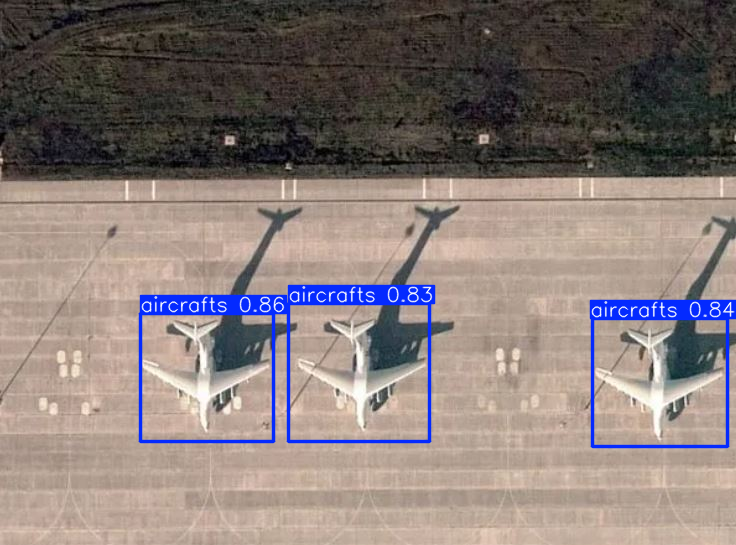

In [5]:
model = YOLO('yolov8sair.pt')

results = model.predict('Aerial_AirBase.jpg')
annotated_frame = results[0].plot()
cv2_imshow(annotated_frame)

#Object Detection in Video-stream#

In [6]:
model = YOLO('yolov8sair.pt')

# Object Detection in Video-stream
cap = cv2.VideoCapture(f"airport_video_source.mp4")
img_array = []

while cap.isOpened():
    success, frame = cap.read()

    if success:
        results = model(frame)
        annotated_frame = results[0].plot()

        img_array.append(annotated_frame)
    else:
        break

cap.release()

# Saving to output video file
size = img_array[0].shape[1], img_array[0].shape[0]  # (384, 640)
writer = cv2.VideoWriter(f"airport_video_output.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 25, size)
for frame in img_array:
    img_n = cv2.resize(frame, size)
    writer.write(img_n)
writer.release()


0: 384x640 13 aircraftss, 128.0ms
Speed: 2.4ms preprocess, 128.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 aircraftss, 11.8ms
Speed: 3.3ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 aircraftss, 13.6ms
Speed: 2.6ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 aircraftss, 13.7ms
Speed: 2.3ms preprocess, 13.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 aircraftss, 13.3ms
Speed: 2.3ms preprocess, 13.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 aircraftss, 10.6ms
Speed: 2.3ms preprocess, 10.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 aircraftss, 10.6ms
Speed: 3.1ms preprocess, 10.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 aircraftss, 10.9ms
Speed: 2.5ms preprocess, 10.9ms inference, 1.9m